In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
pip install seaborn==0.11.0 -q

Note: you may need to restart the kernel to use updated packages.


In [3]:
df2 = pd.read_csv('Speed_Dating_Data.csv', encoding = 'ISO-8859-1')

In [4]:
df2.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [5]:
df2.shape

(8378, 195)

In [6]:
df2.columns

Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order',
       ...
       'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3',
       'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3'],
      dtype='object', length=195)

In [7]:
df2.dtypes

iid           int64
id          float64
gender        int64
idg           int64
condtn        int64
             ...   
attr5_3     float64
sinc5_3     float64
intel5_3    float64
fun5_3      float64
amb5_3      float64
Length: 195, dtype: object

In [8]:
df2.isnull().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
            ... 
attr5_3     6362
sinc5_3     6362
intel5_3    6362
fun5_3      6362
amb5_3      6362
Length: 195, dtype: int64

In [9]:
print(df2.columns.tolist())

['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position', 'positin1', 'order', 'partner', 'pid', 'match', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field', 'field_cd', 'undergra', 'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from', 'zipcode', 'income', 'goal', 'date', 'go_out', 'career', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'de

In [10]:
#Meilleure lisibilité des genres
df2["gender"].replace({0:"Female",1:"Male"}, inplace=True)
df2.gender.value_counts(dropna=True)

Male      4194
Female    4184
Name: gender, dtype: int64

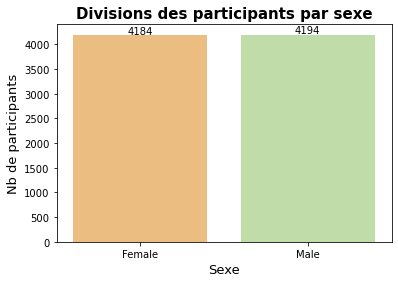

In [11]:
#Division par sexe des participants
countplt, ax = plt.subplots(figsize = (6,4))
ax =sns.countplot(x = 'gender', data=df2, palette='Spectral')
ax.set_title('Divisions des participants par sexe',fontsize = 15, fontweight='bold' )
ax.set_xlabel('Sexe', fontsize = 13)
ax.set_ylabel('Nb de participants', fontsize = 13)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 30,rect.get_height(),horizontalalignment='center', fontsize = 10)

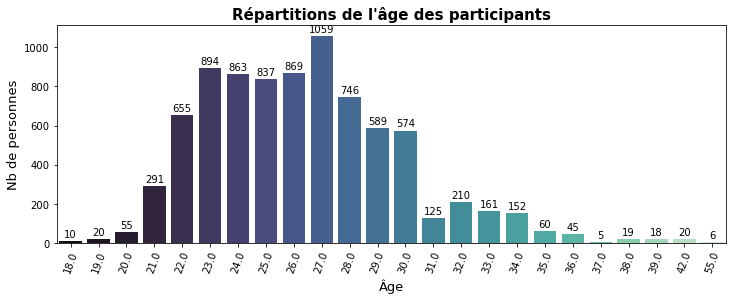

In [12]:
#Visualisation des tranches d'âge des participants
countplt, ax = plt.subplots(figsize = (12,4))
ax = sns.countplot(x = df2["age"], palette='mako')
ax.set_xticklabels(ax.get_xticklabels(), 
                    fontsize=10, 
                    rotation=70)
ax.set_title("Répartitions de l'âge des participants", fontsize = 15, fontweight='bold')
ax.set_ylabel("Nb de personnes", fontsize=13)
ax.set_xlabel("Âge", fontsize=13)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 20,rect.get_height(),horizontalalignment='center', fontsize = 10)

In [13]:
#Visualisation de la répartition des origines
df2['race'] = df2.race.map({1: 'Black', 2: 'Caucasian', 3: 'Hispanic', 
                          4: 'Asian', 5: 'Native American', 6: 'Other'}).fillna(df2.race)
df2.race.value_counts(dropna=False)

Caucasian    4727
Asian        1982
Hispanic      664
Other         522
Black         420
NaN            63
Name: race, dtype: int64

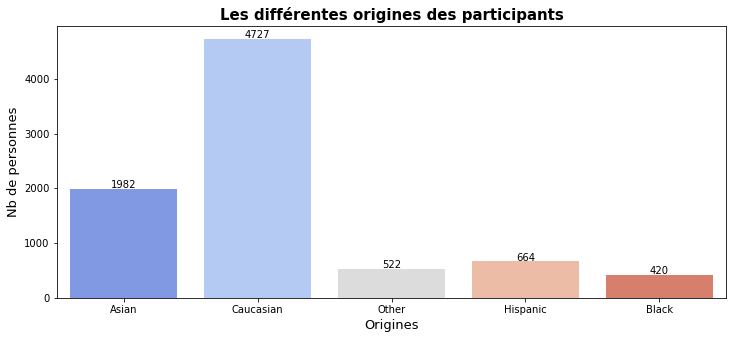

In [14]:
#Illustration des différentes origines des participants
countplt, ax = plt.subplots(figsize = (12,5))
ax = sns.countplot(x = df2["race"], palette='coolwarm')
ax.set_xticklabels(ax.get_xticklabels(), 
                    fontsize=10, 
                    rotation=0)
ax.set_title("Les différentes origines des participants", fontsize = 15, fontweight='bold')
ax.set_ylabel("Nb de personnes", fontsize=13)
ax.set_xlabel("Origines", fontsize=13)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 20,rect.get_height(),horizontalalignment='center', fontsize = 10)

In [15]:
#Mapping des personnes qui déclarent que la race n'est pas un critère important
df2["samerace"].replace({0:"No",1:"Yes"}, inplace=True)
#Personnes qui déclarent que la race n'est pas importante
df2["samerace"].value_counts()

No     5062
Yes    3316
Name: samerace, dtype: int64

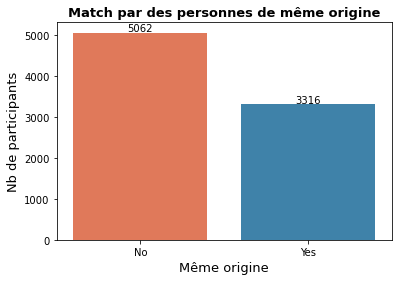

In [16]:
#Visiualisation de l'importance de l'origine pour un second date d'après les déclarations des candidats
countplt, ax = plt.subplots(figsize = (6,4))
ax =sns.countplot(x = 'samerace', data=df2, palette=['#F66D44','#2D87BB'])
ax.set_title('Match par des personnes de même origine',fontsize = 13, fontweight='bold' )
ax.set_xlabel('Même origine', fontsize = 13)
ax.set_ylabel('Nb de participants', fontsize = 13)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 30,rect.get_height(),horizontalalignment='center', fontsize = 10)
plt.show()

In [17]:
# Préparation des données pour la visualisation de l'importance de l'origine dans le matching
def racify(x=0):
    if x>10:
        return "Très important"
    elif x>7:
        return "Important"
    elif x>5:
        return "Plutôt important"
    elif x>3:
        return "Peu important"
    else:
        return "Pas important"

df2["importance_race"] = df2["imprace"].apply(lambda x: "Très important" if x>10
                                                else "Important" if x>7
                                                else "Plutôt important" if x>5
                                                else "Peu important" if x>3
                                                else "Pas important")

df2["importance_race"] = df2["imprace"].apply(racify)


In [18]:
#Groupby la data en fonction de l'importance de la race
imp_race = df2.groupby("importance_race")["dec_o"].count()
imp_race

importance_race
Important           1322
Pas important       4822
Peu important       1167
Plutôt important    1067
Name: dec_o, dtype: int64

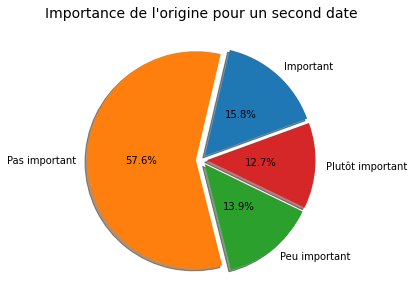

Presque 60% des candidats n'ont effectivement pas accordés d'importance à l'origine pour un second date


In [19]:
#Visualisation de l'accès à un second date en fonction de l'origine
pie, ax = plt.subplots(figsize=[12,5])
labels = imp_race.keys()
plt.pie(x=imp_race, autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5, startangle=20, shadow=True)
plt.title("Importance de l'origine pour un second date", fontsize=14);
pie.set_facecolor('white')
plt.show()
print('Presque 60% des candidats n\'ont effectivement pas accordés d\'importance à l\'origine pour un second date')

In [20]:
#Religion 
# Préparation des données pour la visualisation de l'importance de la religion pour un second date
def religion(x=0):
    if x>10:
        return "Très important"
    elif x>7:
        return "Important"
    elif x>5:
        return "Plutôt important"
    elif x>3:
        return "Peu important"
    else:
        return "Pas important"

df2["importance_religion"] = df2["imprelig"].apply(lambda x: "Très important" if x>10
                                                else "Important" if x>7
                                                else "Plutôt important" if x>5
                                                else "Peu important" if x>3
                                                else "Pas important")

df2["importance_religion"] = df2["imprelig"].apply(religion)

In [21]:
#Nombre de personnes ayant acceptées un second date classés par l'importance de la religion
imp_relig = df2.groupby("importance_religion")["dec_o"].count()
imp_relig

importance_religion
Important           1126
Pas important       4903
Peu important       1221
Plutôt important    1128
Name: dec_o, dtype: int64

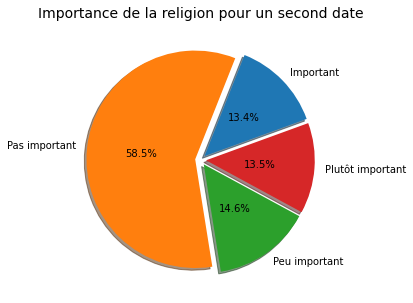

Presque 60% des candidats n'ont effectivement pas accordés d'importance à la religion pour un second date


In [22]:
#Visualisation de l'importance de la religion pour un second date
pie, ax = plt.subplots(figsize=[12,5])
labels = imp_relig.keys()
plt.pie(x=imp_relig, autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5, startangle=20, shadow=True)
plt.title("Importance de la religion pour un second date", fontsize=14);
pie.set_facecolor('white')
plt.show()
print('Presque 60% des candidats n\'ont effectivement pas accordés d\'importance à la religion pour un second date')

In [23]:
#Mapping des champs d'études en vu de la visualisation 
df2['field_cd'] = df2.field_cd.map({1: 'Law', 2: 'Math', 3: 'Soc. Sc.', 4: 'Med. Sc.', 5: 'Eng.', 6: 'Journ.', 7: 'Hist.', 8: 'Econ', 9: 'Educ.', 10: 'Nat. Sc.', 11: 'Soc. Wr.', 12: 'Und.', 13: 'Pol. Sc.',
14: 'Film', 15: 'Arts', 16:'Lang.', 17: 'Arch.', 18: 'Oth.'})

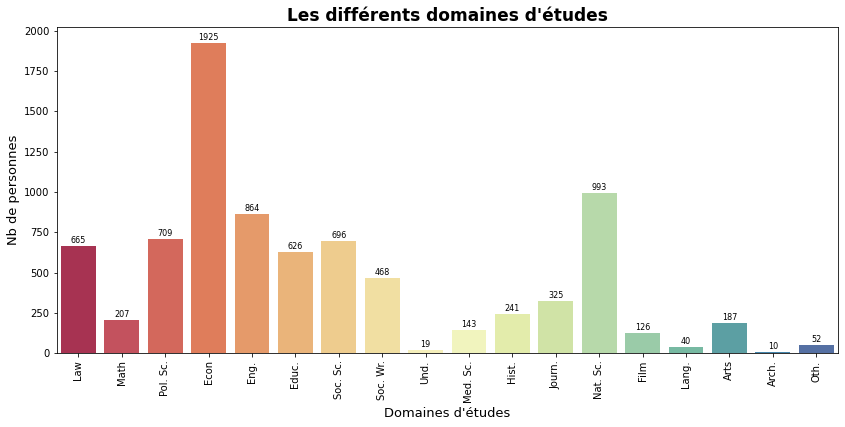

In [24]:
# Visualisation des différents domaines d'études
countplt, ax = plt.subplots(figsize = (14,6))
ax = sns.countplot(x = df2["field_cd"], palette='Spectral')
ax.set_xticklabels(ax.get_xticklabels(), 
                    fontsize=10, 
                    rotation=90)
ax.set_title("Les différents domaines d'études", fontsize = 17, fontweight='bold')
ax.set_ylabel("Nb de personnes", fontsize=13)
ax.set_xlabel("Domaines d'études", fontsize=13)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 20,rect.get_height(),horizontalalignment='center', fontsize = 8)

In [25]:
# Visualisation des Match par field commun
match_field=df2.groupby(["field"])[["match"]].count().sort_values("match", ascending=False)
match_field.head(100)

,match
field,
Business,521
MBA,468
Law,462
Social Work,378
International Affairs,252
...,...
genetics,21
Electrical Engg.,21
medical informatics,21


In [26]:
# Préparation des données pour la visualisation de l'importance du sport pour un second date
def sport(x=0):
    if x>10:
        return "Très important"
    elif x>7:
        return "Important"
    elif x>5:
        return "Plutôt important"
    elif x>3:
        return "Peu important"
    else:
        return "Pas important"

df2["sportsimp"] = df2["sports"].apply(lambda x: "Très important" if x>10
                                                else "Important" if x>7
                                                else "Plutôt important" if x>5
                                                else "Peu important" if x>3
                                                else "Pas important")

df2["sportsimp"] = df2["sports"].apply(sport)

In [27]:
#Groupby la data en fonction de l'importance de la race
match_sport = df2.groupby("sportsimp")["dec_o"].count()
match_sport 

sportsimp
Important           3415
Pas important       1574
Peu important       1444
Plutôt important    1945
Name: dec_o, dtype: int64

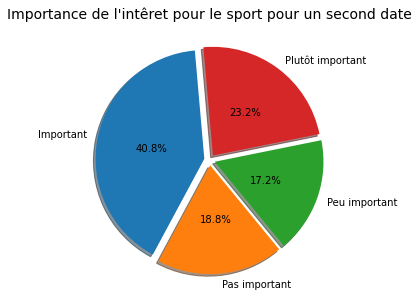

Presque la moitié des candidats accordent un second date en fonction de leur interet commun pour le sport


In [28]:
#Visualisation de l'importance de l'intêret pour le sport dans le matching
pie, ax = plt.subplots(figsize=[12,5])
labels = match_sport .keys()
plt.pie(x=match_sport , autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5, startangle=95, shadow=True)
plt.title("Importance de l'intêret pour le sport pour un second date", fontsize=14);
pie.set_facecolor('white')
plt.show()
print('Presque la moitié des candidats accordent un second date en fonction de leur interet commun pour le sport')

In [29]:
print('Il est possible que les candidats match plus pour leur centres d\'interets communs, leur études que par leurs origines ou leur religion.')

Il est possible que les candidats match plus pour leur centres d'interets communs, leur études que par leurs origines ou leur religion.
